In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve
from sklearn import tree

In [2]:
x = pd.read_csv(r'C:\Users\HP\ML\Insurance_Claim\insurance2.csv')

In [3]:
x.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
x.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
x.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

<AxesSubplot:>

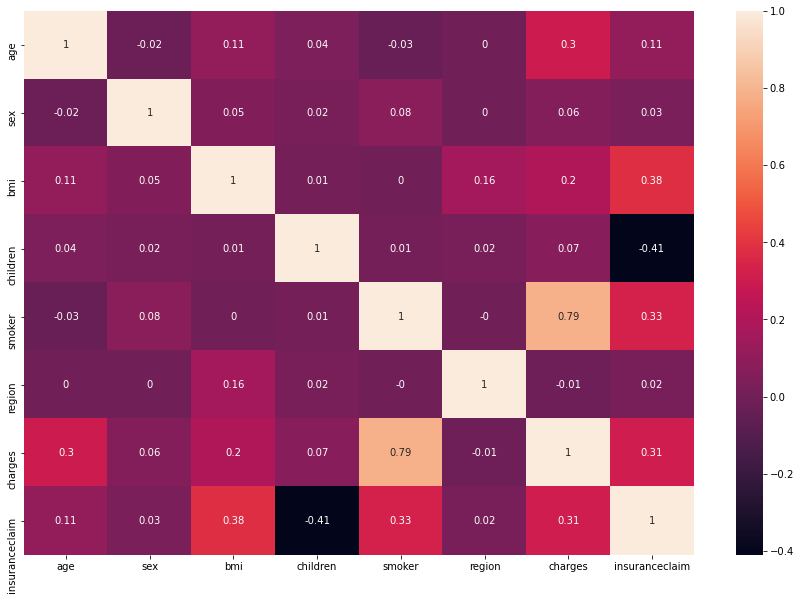

In [7]:
correlation_matrix = x.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


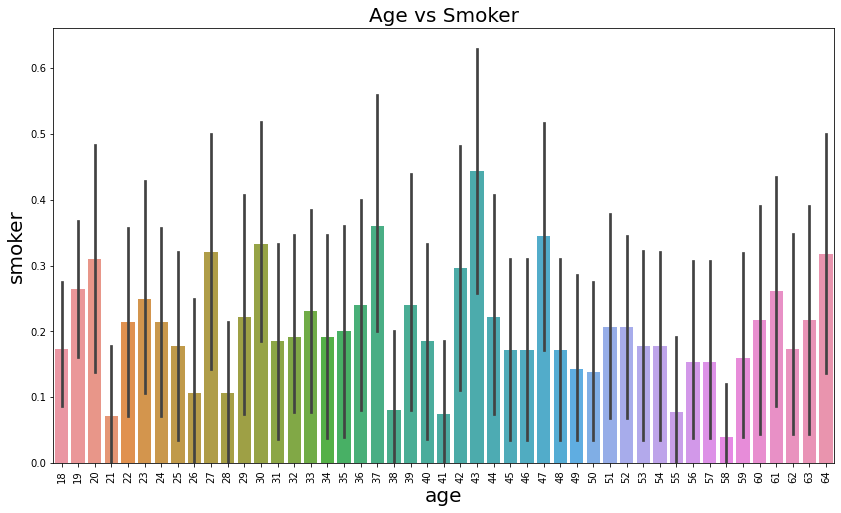

In [8]:
plt.figure(figsize=(14,8))
sns.barplot(x['age'], x['smoker'])
plt.xlabel('age', fontsize=20)
plt.ylabel('smoker', fontsize=20)
plt.title('Age vs Smoker', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


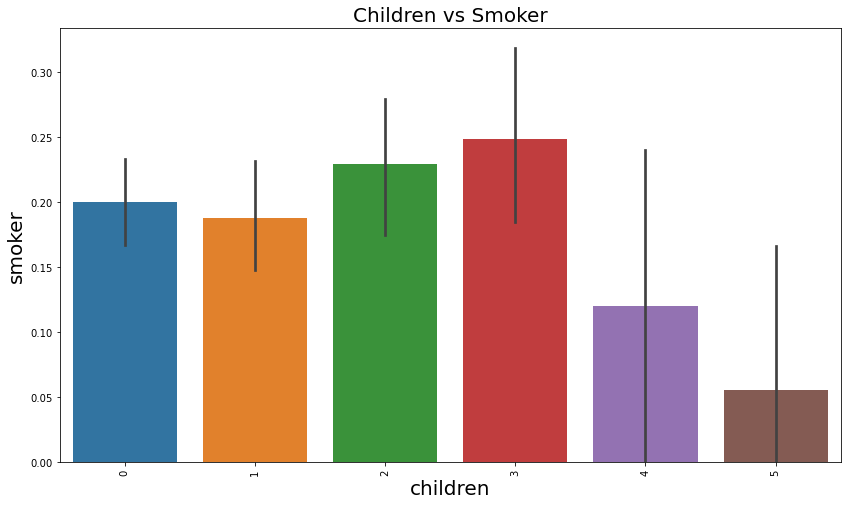

In [9]:
plt.figure(figsize=(14,8))
sns.barplot(x['children'], x['smoker'])
plt.xlabel('children', fontsize=20)
plt.ylabel('smoker', fontsize=20)
plt.title('Children vs Smoker', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


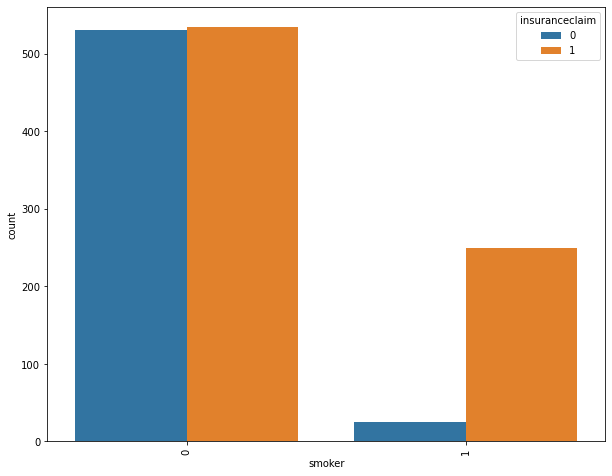

In [10]:
plt.figure(figsize=(10,8))
s1=sns.countplot(x.smoker, hue=x.insuranceclaim)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


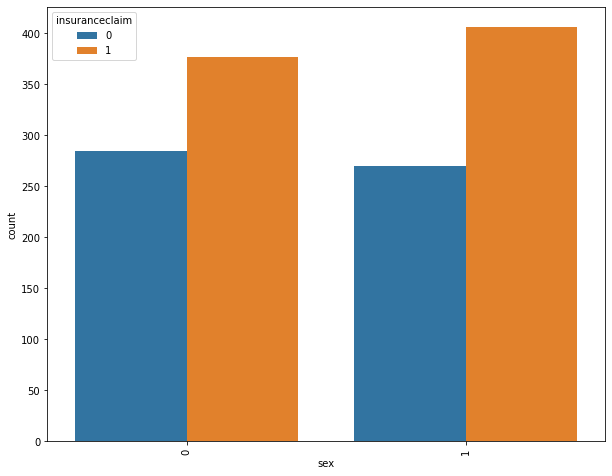

In [11]:
plt.figure(figsize=(10,8))
s1=sns.countplot(x.sex, hue=x.insuranceclaim)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


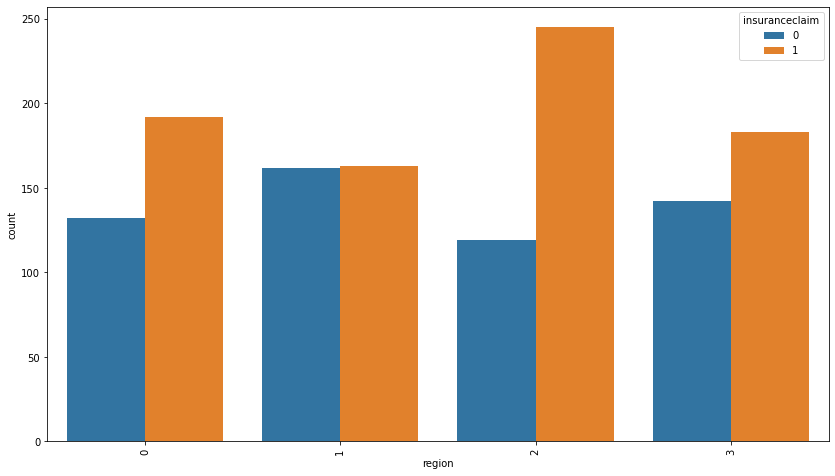

In [12]:
plt.figure(figsize=(14,8))
s1=sns.countplot(x.region, hue=x.insuranceclaim)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


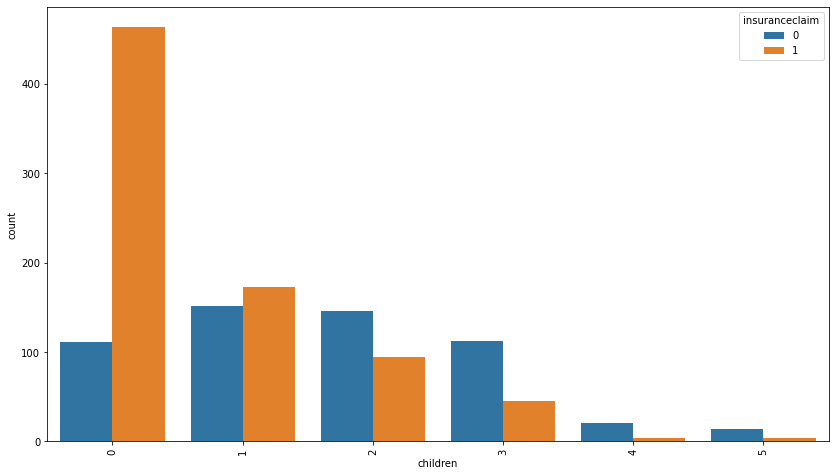

In [13]:
plt.figure(figsize=(14,8))
s1=sns.countplot(x.children, hue=x.insuranceclaim)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [14]:
x['insuranceclaim'].value_counts(dropna=False)

1    783
0    555
Name: insuranceclaim, dtype: int64

In [15]:
x['smoker'].value_counts(dropna=False)

0    1064
1     274
Name: smoker, dtype: int64

In [16]:
x['children'].value_counts(dropna=False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
y = x['insuranceclaim']
y.head()
X=x.drop('insuranceclaim', axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [19]:
logmodel = LogisticRegression()

In [20]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred= logmodel.predict(X_test)

In [22]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logmodel,X,y)
print(scores)

[0.7761194  0.79477612 0.82089552 0.7752809  0.77153558]


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7860696517412935